###Model Training

#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv('ChicagoCrimeData.csv')

In [49]:
df.replace(['', 'NA', 'NaN','nan'], np.nan, inplace=True)
df.dropna()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,9608166,HX258445,2014-05-12,010XX N WELLS ST,1900,OTHER NARCOTIC VIOLATION,INTOXICATING COMPOUNDS,SIDEWALK,True,False,...,18,27.0,8.0,18,1174535.0,1907194.0,2014,41.900738,-87.634361,"(41.900737976, -87.634361322)"
528,10453948,HZ192829,2016-03-01,028XX E 79TH ST,1055,HUMAN TRAFFICKING,INVOLUNTARY SERVITUDE,APARTMENT,False,False,...,4,7.0,46.0,26,1196679.0,1853139.0,2016,41.751885,-87.554826,"(41.751885152, -87.554825997)"
529,10397129,HZ133234,2016-01-29,006XX W HARRISON ST,5114,NON - CRIMINAL,FOID - REVOCATION,STREET,False,False,...,1,2.0,28.0,26,1172257.0,1897564.0,2016,41.874363,-87.643013,"(41.874363279, -87.643013039)"
530,3269495,HJ747227,2003-11-08,012XX W 81ST ST,510,RITUALISM,AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY,OTHER,False,False,...,6,21.0,71.0,04B,1169648.0,1851076.0,2003,41.746852,-87.653941,"(41.746852486, -87.653941385)"


In [50]:
df.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [51]:
df.describe()

,ID,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE
count,5.330000e+02,533.000000,533.000000,490.000000,490.000000,5.290000e+02,5.290000e+02,533.00000,529.000000,529.000000
mean,6.228301e+06,1187.037523,11.195122,22.608163,37.542857,1.162876e+06,1.886223e+06,2008.34334,41.843429,-87.677818
std,3.027454e+06,660.592263,6.496631,13.080119,21.409514,1.650197e+04,3.009980e+04,4.94940,0.082798,0.060073
min,2.114900e+04,111.000000,1.000000,1.000000,1.000000,1.100658e+06,1.814512e+06,2001.00000,41.645796,-87.905227
25%,3.420516e+06,711.000000,6.000000,12.000000,23.000000,1.151715e+06,1.860454e+06,2004.00000,41.772556,-87.718166
50%,6.231712e+06,1111.000000,10.000000,24.000000,30.000000,1.163235e+06,1.891447e+06,2008.00000,41.857737,-87.676733
75%,8.875058e+06,1634.000000,16.000000,32.000000,58.000000,1.174618e+06,1.907711e+06,2012.00000,41.902298,-87.634677
max,1.127717e+07,2535.000000,25.000000,50.000000,77.000000,1.204126e+06,1.951001e+06,2018.00000,42.021178,-87.528223


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 533 entries, 0 to 532
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     533 non-null    int64  
 1   CASE_NUMBER            533 non-null    object 
 2   DATE                   533 non-null    object 
 3   BLOCK                  533 non-null    object 
 4   IUCR                   533 non-null    object 
 5   PRIMARY_TYPE           533 non-null    object 
 6   DESCRIPTION            533 non-null    object 
 7   LOCATION_DESCRIPTION   533 non-null    object 
 8   ARREST                 533 non-null    bool   
 9   DOMESTIC               533 non-null    bool   
 10  BEAT                   533 non-null    int64  
 11  DISTRICT               533 non-null    int64  
 12  WARD                   490 non-null    float64
 13  COMMUNITY_AREA_NUMBER  490 non-null    float64
 14  FBICODE                533 non-null    object 
 15  X_COOR

In [83]:
# Handle missing values
# Fill numerical columns with their mean
numerical_columns = ['X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Fill categorical columns with their mode
categorical_columns = ['WARD', 'COMMUNITY_AREA_NUMBER']
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Drop rows where LOCATION is NaN since it's derived from LATITUDE and LONGITUDE (now imputed)
df = df.dropna(subset=['LOCATION'])

# Verify if all NaN values are addressed
missing_values_after = df.isnull().sum()
missing_values_after

ID                       0
CASE_NUMBER              0
DATE                     0
BLOCK                    0
IUCR                     0
PRIMARY_TYPE             0
DESCRIPTION              0
LOCATION_DESCRIPTION     0
ARREST                   0
DOMESTIC                 0
BEAT                     0
DISTRICT                 0
WARD                     0
COMMUNITY_AREA_NUMBER    0
FBICODE                  0
X_COORDINATE             0
Y_COORDINATE             0
YEAR                     0
LATITUDE                 0
LONGITUDE                0
LOCATION                 0
dtype: int64

#### Preparing X and Y variables

In [104]:
X = df.drop(columns=['PRIMARY_TYPE'],axis=1)

In [105]:
df.dropna()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,PRIMARY_TYPE,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,...,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,THEFT,FROM BUILDING,SMALL RETAIL STORE,False,False,...,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,THEFT,$500 AND UNDER,OTHER,False,False,...,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,THEFT,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,...,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,...,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,THEFT,$500 AND UNDER,ALLEY,False,False,...,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
528,10453948,HZ192829,2016-03-01,028XX E 79TH ST,1055,HUMAN TRAFFICKING,INVOLUNTARY SERVITUDE,APARTMENT,False,False,...,4,7.0,46.0,26,1196679.0,1853139.0,2016,41.751885,-87.554826,"(41.751885152, -87.554825997)"
529,10397129,HZ133234,2016-01-29,006XX W HARRISON ST,5114,NON - CRIMINAL,FOID - REVOCATION,STREET,False,False,...,1,2.0,28.0,26,1172257.0,1897564.0,2016,41.874363,-87.643013,"(41.874363279, -87.643013039)"
530,3269495,HJ747227,2003-11-08,012XX W 81ST ST,510,RITUALISM,AGG RIT MUT: HANDS/FIST/FEET SERIOUS INJURY,OTHER,False,False,...,6,21.0,71.0,04B,1169648.0,1851076.0,2003,41.746852,-87.653941,"(41.746852486, -87.653941385)"
531,10840565,JA143710,2017-02-06,009XX N KARLOV AVE,5073,NON-CRIMINAL (SUBJECT SPECIFIED),NOTIFICATION OF CIVIL NO CONTACT ORDER,RESIDENCE,False,True,...,11,37.0,23.0,26,1148881.0,1905963.0,2017,41.897895,-87.728622,"(41.89789489, -87.728622316)"


In [106]:
X.head()

,ID,CASE_NUMBER,DATE,BLOCK,IUCR,DESCRIPTION,LOCATION_DESCRIPTION,ARREST,DOMESTIC,BEAT,DISTRICT,WARD,COMMUNITY_AREA_NUMBER,FBICODE,X_COORDINATE,Y_COORDINATE,YEAR,LATITUDE,LONGITUDE,LOCATION
0,3512276,HK587712,2004-08-28,047XX S KEDZIE AVE,890,FROM BUILDING,SMALL RETAIL STORE,False,False,911,9,14.0,58.0,6,1155838.0,1873050.0,2004,41.807440,-87.703956,"(41.8074405, -87.703955849)"
1,3406613,HK456306,2004-06-26,009XX N CENTRAL PARK AVE,820,$500 AND UNDER,OTHER,False,False,1112,11,27.0,23.0,6,1152206.0,1906127.0,2004,41.898280,-87.716406,"(41.898279962, -87.716405505)"
2,8002131,HT233595,2011-04-04,043XX S WABASH AVE,820,$500 AND UNDER,NURSING HOME/RETIREMENT HOME,False,False,221,2,3.0,38.0,6,1177436.0,1876313.0,2011,41.815933,-87.624642,"(41.815933131, -87.624642127)"
3,7903289,HT133522,2010-12-30,083XX S KINGSTON AVE,840,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,423,4,7.0,46.0,6,1194622.0,1850125.0,2010,41.743665,-87.562463,"(41.743665322, -87.562462756)"
4,10402076,HZ138551,2016-02-02,033XX W 66TH ST,820,$500 AND UNDER,ALLEY,False,False,831,8,15.0,66.0,6,1155240.0,1860661.0,2016,41.773455,-87.706480,"(41.773455295, -87.706480471)"


In [107]:
print(df['COMMUNITY_AREA_NUMBER'].unique())


[58. 23. 38. 46. 66. 24. 14. 72. 21. 65. 28. 49. 26. 22. 48. 44. 25.  8.
 32. 69. 59. 68. 76. 73. 35.  6. 30. 43. 31.  5. 42. 29.  7. 67. 39. 77.
 61.  2. 63. 64. 62. 75.  1. 15. 71. 16. 50. 56. 51.  4. 27. 19. 37. 70.
 54. 60. 10. 41. 52. 53. 11. 18. 17. 47. 55.  3. 45. 33. 20. 12.]


In [108]:
print(df['LOCATION_DESCRIPTION'].unique())

['SMALL RETAIL STORE' 'OTHER' 'NURSING HOME/RETIREMENT HOME' 'RESIDENCE'
 'ALLEY' 'PARKING LOT/GARAGE(NON.RESID.)' 'STREET' 'GROCERY FOOD STORE'
 'DEPARTMENT STORE' 'BAR OR TAVERN' 'RESIDENTIAL YARD (FRONT/BACK)'
 'RESIDENCE PORCH/HALLWAY' 'CTA PLATFORM' 'VACANT LOT/LAND' 'SIDEWALK'
 'ATHLETIC CLUB' 'AIRPORT/AIRCRAFT' 'APARTMENT' 'MOVIE HOUSE/THEATER'
 'VEHICLE NON-COMMERCIAL' 'RESTAURANT' 'RESIDENCE-GARAGE'
 'COMMERCIAL / BUSINESS OFFICE' 'TAVERN/LIQUOR STORE' 'CONSTRUCTION SITE'
 'GAS STATION' 'DRUG STORE' 'CTA BUS' 'SCHOOL, PUBLIC, GROUNDS'
 'SCHOOL, PUBLIC, BUILDING' 'CHURCH/SYNAGOGUE/PLACE OF WORSHIP'
 'OTHER COMMERCIAL TRANSPORTATION' 'CHA APARTMENT' 'WAREHOUSE'
 'POLICE FACILITY/VEH PARKING LOT' 'HOSPITAL BUILDING/GROUNDS'
 'FACTORY/MANUFACTURING BUILDING' 'CLEANING STORE' 'CTA TRAIN' 'BANK'
 'CHA PARKING LOT/GROUNDS' 'LIBRARY' 'CHA HALLWAY/STAIRWELL/ELEVATOR'
 'COLLEGE/UNIVERSITY GROUNDS' 'CONVENIENCE STORE' 'HOUSE'
 'GOVERNMENT BUILDING/PROPERTY']


In [109]:
y = df['COMMUNITY_AREA_NUMBER']

In [110]:
y

0      58.0
1      23.0
2      38.0
3      46.0
4      66.0
       ... 
528    46.0
529    28.0
530    71.0
531    23.0
532    25.0
Name: COMMUNITY_AREA_NUMBER, Length: 529, dtype: float64

In [111]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [112]:
X = preprocessor.fit_transform(X)

In [113]:
X.shape

(529, 2371)

In [114]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((423, 2371), (106, 2371))

#### Create an Evaluate Function to give all metrics after model Training

In [115]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [116]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}
    
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0001
- Mean Absolute Error: 0.0001
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.3539
- Mean Absolute Error: 0.2896
- R2 Score: 0.9997


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.9966
- Mean Absolute Error: 0.8674
- R2 Score: 0.9977
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9804
- Mean Absolute Error: 0.8620
- R2 Score: 0.9977


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0833
- Mean Absolute Error: 0.0613
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4297
- Mean Absolute Error: 0.3514
- R2 Score: 0.9996


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6.1212
- Mean Absolute Error: 3.9461
- R2 Score: 0.9144
-----------------------

### Results

In [97]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.966030
4,Decision Tree,0.946088
3,K-Neighbors Regressor,0.791059
1,Lasso,0.714995
2,Ridge,0.684262
0,Linear Regression,0.679836


## Random Forest Regressor

In [117]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.97


 ## Plot y_pred and y_test

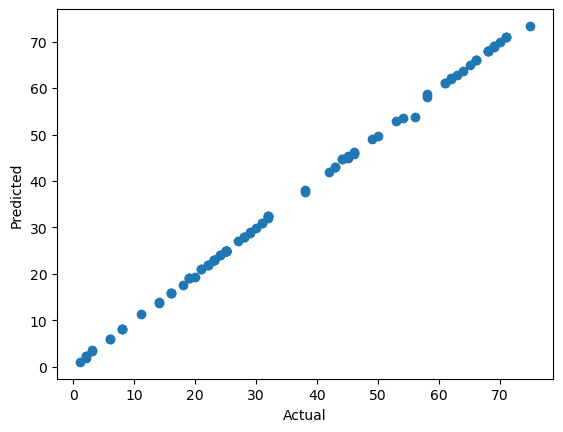

In [118]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

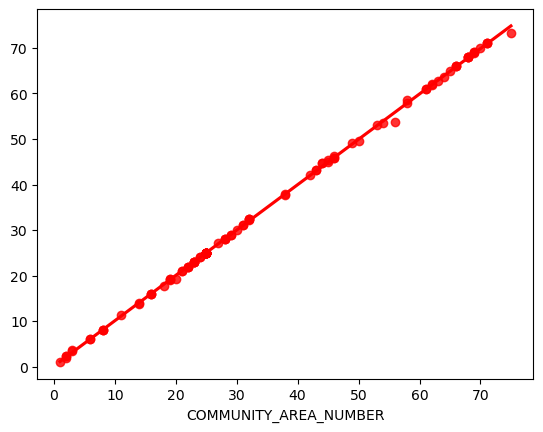

In [119]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [121]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
140,25.0,25.00,0.00
399,43.0,43.09,-0.09
6,14.0,13.64,0.36
336,24.0,24.00,0.00
324,18.0,17.65,0.35
...,...,...,...
342,44.0,44.81,-0.81
460,25.0,25.00,0.00
131,50.0,49.60,0.40
340,2.0,2.38,-0.38
